<a href="https://colab.research.google.com/github/mikeusru/scikit-learn-training/blob/main/multiclass_classification_decision_boundaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Classification and Decision Boundaries
We're going to take a peak at the iris dataset to understand how multiclass classification in scikit-learn works, as well as how decision boundaries are estimated and what they are.

The iris dataset consists of information about three individual species of irises - Virginica, Setosa, and Versicolor. All pretty, 

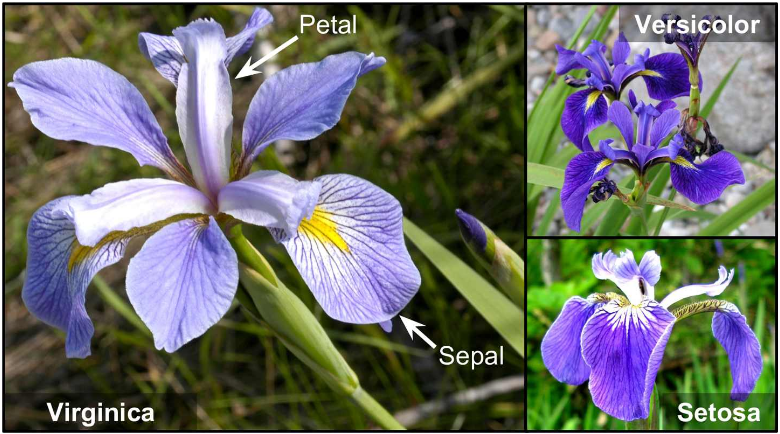

We have data on the petal and sepal lengths and widths, and we can use these to classify which kind of iris we have in front of us. What fun! This dataset comes preloaded in sklearn, so we don't need to download it.

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

The data's in a dictionary, and `iris['data']` will give us the actual array of measurements, while `iris['target']` will tell us which species the measurement is from.

For simplicity, we'll first look at the decision boundary between Virginica and the other two, only training our model on a single feature (petal width).

In [ ]:
import numpy as np

X = iris['data'][:,3:] # petal width
y = (iris["target"] == 2).astype(np.int)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

We fit a Logistic Regression model on petal width and taught it to classify virginica versus non-virginica. Now, we'll make a new (fake) dataset, `X_new`, to plot probabilities for petal widths of 0 to 3 cm

 

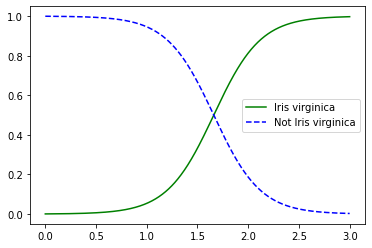

In [ ]:
from matplotlib import pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris virginica")
plt.legend()

## Decision Boundary
Above, we see our decisions being made when the petal width is between 1.5 and 2cm. Anything to the left of the crossing of the lines is classified as not virginica, anything to the right of it is virginica. On the Y axis, we see the certainty our algorithm has. 0.5 means it's right in the middle, 0.9 means it's 90% sure the flower's a virginica.

We can test our model on new predictions - a petal of 1.5 should give us a negative result, and a petal of 2 should be positive.

In [15]:
log_reg.predict([[1.5],[2.0]])

array([0, 1])

## Softmax Regression
Also called Multinomial Logistic Regression, softmax regression can be used to support multiple classes directly, without doing a one-vs-all training approach. Softmax is a way of assigning a score to each class, then estimating the relative probability of each class being right using the softmax function. For example, choice A will get a probability of 70, while choices B and C will get probabilities of 20 and 10.

In [24]:
X = iris["data"][:, (2,3)] # petal length and width because what's a sepal anyway i'm a neuroscientist not a plant biologist
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0, 0.5, 'petal width')

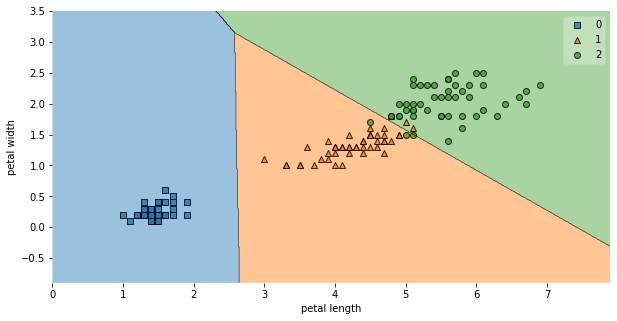

In [30]:
from mlxtend.plotting import plot_decision_regions
fig = plt.figure(figsize=(10,5))
fig = plot_decision_regions(X=X, y=y, clf=softmax_reg)
plt.xlabel('petal length')
plt.ylabel('petal width')